In [1]:
import numpy as np 
import pandas as pd
import torch


all_cards_df = pd.read_csv('/kaggle/input/all-mtg-cards/all_mtg_cards.csv')
all_cards_df.head()

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550.0,normal,NaN,{5}{W}{W},7.0,['W'],['W'],Creature — Human Cleric,NaN,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","['10E', 'JUD', 'UMA']",First strike (This creature deals combat damag...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,NaN,normal,NaN,{5}{W}{W},7.0,['W'],['W'],Creature — Human Cleric,NaN,...,NaN,"['10E', 'JUD', 'UMA']",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465.0,normal,NaN,{4}{W},5.0,['W'],['W'],Creature — Angel,NaN,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",Flying (This creature can't be blocked except ...,Creature - Angel,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,Angel of Mercy,NaN,normal,NaN,{4}{W},5.0,['W'],['W'],Creature — Angel,NaN,...,NaN,"['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,Angelic Blessing,129711.0,normal,NaN,{2}{W},3.0,['W'],['W'],Sorcery,NaN,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","['10E', '9ED', 'EXO', 'P02', 'POR', 'PS11', 'S...",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382


Thirty nine columns. Let's take a look at some of those in more depth starting with the amount of unique cards. This tells us we're left with around 26k unique cards.

In [2]:
all_cards_no_dups = all_cards_df.drop_duplicates(subset="name")

print(all_cards_no_dups["name"].count())


25937


In [3]:
print(all_cards_no_dups.columns.tolist())

['name', 'multiverse_id', 'layout', 'names', 'mana_cost', 'cmc', 'colors', 'color_identity', 'type', 'supertypes', 'subtypes', 'rarity', 'text', 'flavor', 'artist', 'number', 'power', 'toughness', 'loyalty', 'variations', 'watermark', 'border', 'timeshifted', 'hand', 'life', 'reserved', 'release_date', 'starter', 'rulings', 'foreign_names', 'printings', 'original_text', 'original_type', 'legalities', 'source', 'image_url', 'set', 'set_name', 'id']


Magic the Gathering is well regarded for its art. I was curious to see how many different artists there are and the most prolific ones. Kev Walker is putting in work wow! Also 1116 artists was more than I was expecting somehow?

In [4]:
print(all_cards_no_dups['artist'].nunique())

all_cards_no_dups.groupby(['artist']).count().sort_values(by="name", ascending=False)["name"].head(30)

1116


artist
Kev Walker             378
Svetlin Velinov        283
Daarken                269
Dan Scott              265
Greg Staples           259
Pete Venters           237
Christopher Moeller    232
Carl Critchlow         193
Ron Spencer            192
Steve Prescott         191
Igor Kieryluk          190
John Avon              187
Matt Stewart           184
Zoltan Boros           182
Chris Rahn             179
Jesper Ejsing          173
Mark Tedin             170
Izzy                   169
Matt Cavotta           165
Eric Deschamps         161
Slawomir Maniak        158
Karl Kopinski          158
Daniel Ljunggren       156
Heather Hudson         156
Mark Zug               156
Volkan Baǵa            156
Daren Bader            154
Nils Hamm              151
Kieran Yanner          151
Wayne Reynolds         150
Name: name, dtype: int64

In [5]:
print(all_cards_no_dups["color_identity"].value_counts())

color_identity
['B']                        3908
['W']                        3845
['R']                        3841
['U']                        3815
['G']                        3764
['U', 'W']                    376
['B', 'R']                    376
['B', 'U']                    372
['G', 'R']                    363
['G', 'W']                    357
['B', 'G']                    305
['B', 'W']                    302
['R', 'W']                    299
['R', 'U']                    295
['G', 'U']                    287
['B', 'G', 'R', 'U', 'W']      93
['B', 'R', 'U']                90
['G', 'R', 'W']                83
['B', 'U', 'W']                81
['B', 'G', 'R']                81
['G', 'U', 'W']                75
['B', 'R', 'W']                48
['R', 'U', 'W']                43
['B', 'G', 'U']                42
['G', 'R', 'U']                37
['B', 'G', 'W']                34
['G', 'R', 'U', 'W']            4
['B', 'G', 'U', 'W']            3
['B', 'R', 'U', 'W']            2

There is a hierarchy in which the volume of cards decreases as the number of colors increases. Monocolour cards make up the largest group of cards by far. Black has the most of the monos by just a bit, and green has the least. Note that there are cards called 'colourless' which are not present here (with about 2600 cards) because their color_identity column is 'NaN'. There is one wrinkle where WUBRG cards (cards that cost at least one of each colour) are more common than any tri-colour card category and more than all the quad-colours combined. 

In [6]:
# Convert a string column to a list of strings
def str_to_list(cell):
    cell = ''.join(c for c in cell if c not in "'[]")  # Remove brackets and quotes
    cell = cell.split(', ')  # Split into a list
    return cell

# Define an overall card color category, including Colourless and Multi
def color_to_category(x):
    try:
        size = len(x)
        if size == 0:
            return "Colorless"
        elif size == 1:
            return x[0]
        else:
            return "Multi"
    except:
        return "None"

# Ensure no SettingWithCopyWarning by using .loc[]
all_cards_no_dups = all_cards_no_dups.copy()  # Create an explicit copy to avoid ambiguity

# Step-by-step processing of the 'overall_color' column
all_cards_no_dups.loc[:, "overall_color"] = all_cards_no_dups["color_identity"].apply(str)
all_cards_no_dups.loc[:, "overall_color"] = all_cards_no_dups["overall_color"].apply(lambda x: "[]" if x == "nan" else x)
all_cards_no_dups.loc[:, "overall_color"] = all_cards_no_dups["overall_color"].apply(eval)
all_cards_no_dups.loc[:, "overall_color"] = all_cards_no_dups["overall_color"].apply(color_to_category)

In [7]:
# Define a mapping of shorthand to full names
color_mapping = {
    'B': 'Black',
    'W': 'White',
    'U': 'Blue',
    'R': 'Red',
    'G': 'Green',
    'Multi': 'Multicolor'
}

# Replace the values in the 'overall_color' column using the mapping
all_cards_no_dups['overall_color'] = all_cards_no_dups['overall_color'].replace(color_mapping)

# Display the unique values in the updated column to verify
print(all_cards_no_dups['overall_color'].unique())

['White' 'Blue' 'Black' 'Red' 'Green' 'Colorless' 'Multicolor']


<Axes: xlabel='overall_color'>

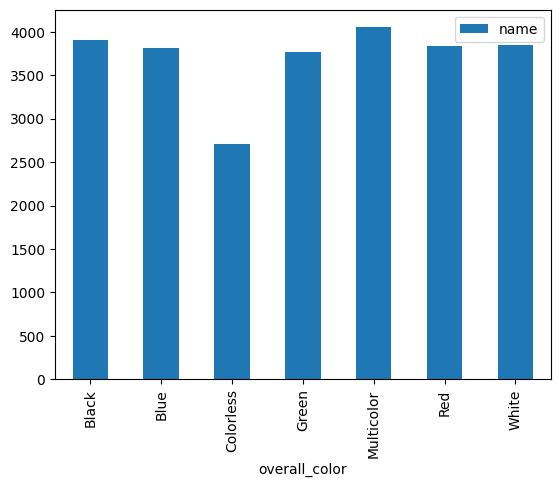

In [8]:
all_cards_no_dups.groupby(['overall_color']).count().plot(kind='bar', y='name')

Combining all of the multicolors into one categoty puts them at the most represented with slightly over four thousand entries and colourless the least with around twenty six hundred. Still, this dataset is fairly balanced.

# Name Wordcloud
A wordcloud to get a quick visualisation of the most common names in cards.

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def make_word_map(col, df):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in df[col]:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

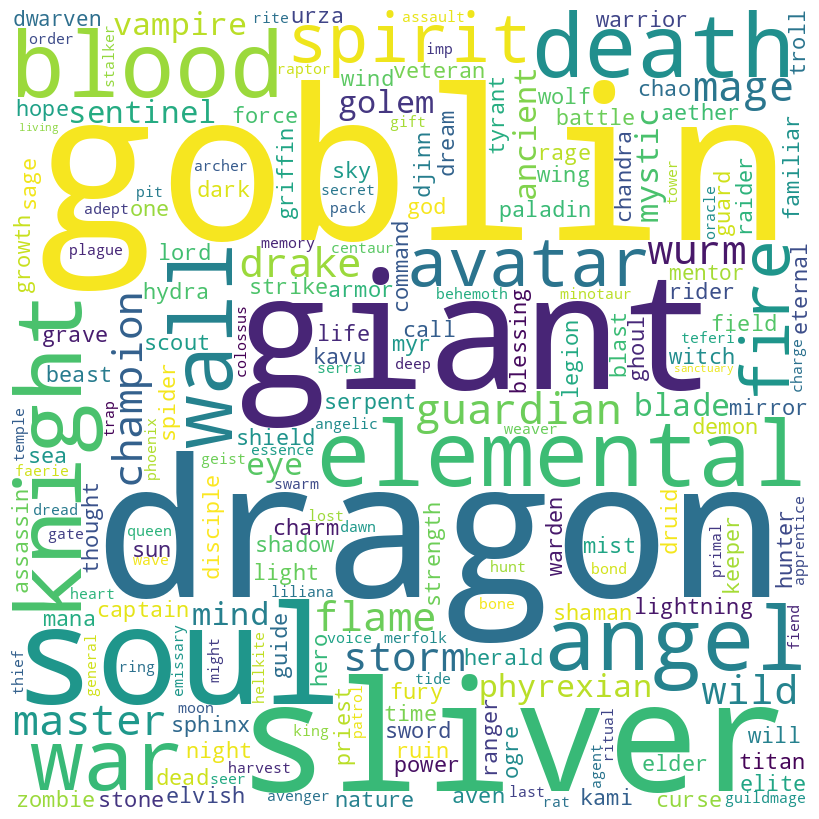

In [10]:
make_word_map("name", all_cards_no_dups)

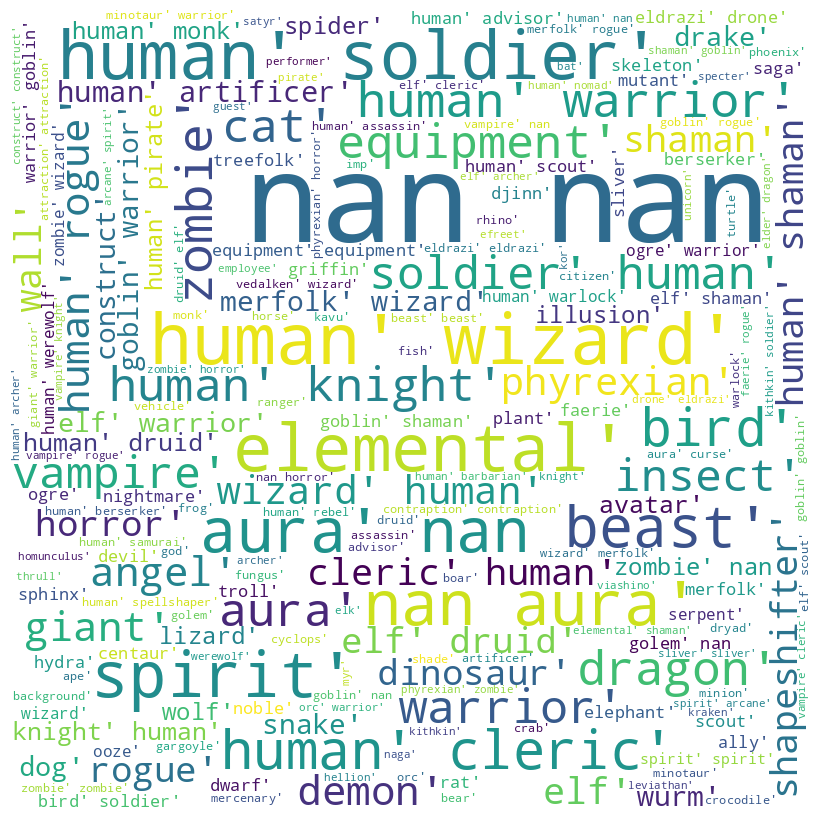

In [11]:
make_word_map("subtypes", all_cards_no_dups)

Another wordmap of subtypes. The apostrophies are distracting, but here we can see the prevalence of the human typing.

# Subtypes Exploration

Now let's take a look into the card's typing and how that relates to their colour.

In [12]:
# converts the values in the "subtypes" column of the all_cards_no_dups DataFrame to strings
# replace representation of NaN with an empty list
# convert the string representations of lists back into actual list objects

all_cards_no_dups["subtypes"] = all_cards_no_dups["subtypes"].apply(str)
all_cards_no_dups["subtypes"] = all_cards_no_dups["subtypes"].apply(lambda x: "[]" if x == "nan" else x)
all_cards_no_dups["subtypes"] = all_cards_no_dups["subtypes"].apply(eval)

In [13]:
# creates a new DataFrame card_color_subtypes containing only the "name", "subtypes", and "overall_color" columns
# explode means each subtype will have its own row, facilitating easier counting and grouping

card_color_subtypes = all_cards_no_dups.loc[:, ["name", "subtypes", "overall_color"]]
card_color_subtypes = card_color_subtypes.explode("subtypes")
card_subtype_count_by_color = card_color_subtypes.groupby(["subtypes", "overall_color"]).count()
card_subtype_count_by_color

name
subtypes overall_color      
Abian    Multicolor        1
Advisor  Black             5
         Blue             15
         Green             6
         Multicolor       34
...                      ...
Zubera   Green             1
         Red               2
         White             1
and/or   Green             1
of       White             1

[1373 rows x 1 columns]

                         name
subtypes  overall_color      
Human     Black           390
Zombie    Black           385
Vampire   Black           211
Aura      Black           196
Horror    Black           141
Rogue     Black           133
Warrior   Black           122
Demon     Black           122
Phyrexian Black           118
Spirit    Black           110


<Axes: xlabel='subtypes,overall_color'>

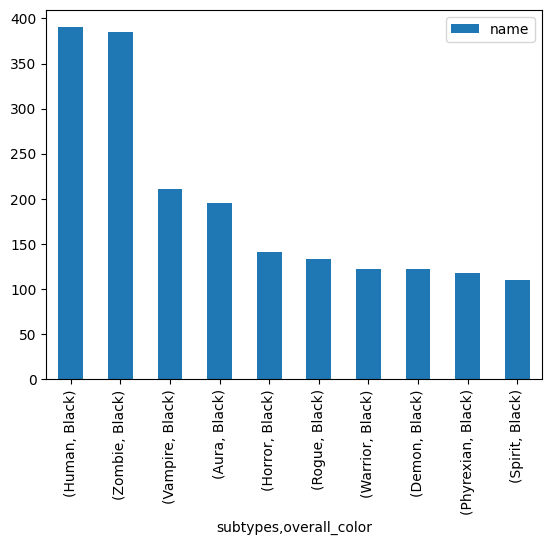

In [14]:
# print top 10 most common black subtypes, then continue with the other colours

black_types = card_subtype_count_by_color.loc[card_subtype_count_by_color.index.get_level_values("overall_color") == "Black"]
black_types = black_types.sort_values(by="name", ascending=False)
print(black_types.head(10))
black_types.head(10).plot(kind="bar")

                        name
subtypes overall_color      
Human    White           941
Soldier  White           483
Cleric   White           327
Aura     White           240
Knight   White           175
Angel    White           171
Spirit   White           141
Bird     White           125
Cat      White           101
Warrior  White            98


<Axes: xlabel='subtypes,overall_color'>

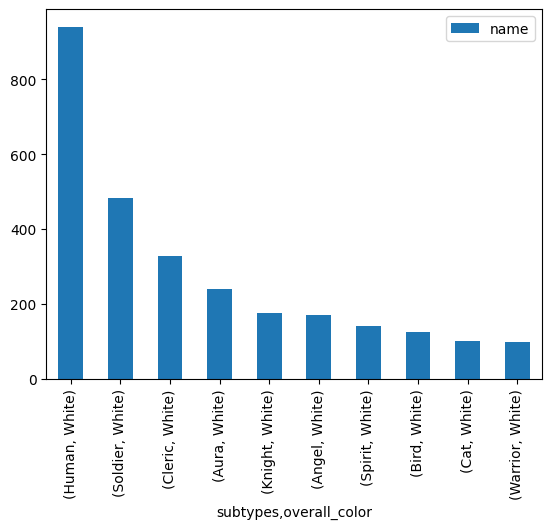

In [15]:
white_types = card_subtype_count_by_color.loc[card_subtype_count_by_color.index.get_level_values("overall_color") == "White"]
white_types = white_types.sort_values(by="name", ascending=False)
print(white_types.head(10))
white_types.head(10).plot(kind="bar")

                         name
subtypes  overall_color      
Elf       Green           350
Human     Green           309
Druid     Green           217
Warrior   Green           206
Beast     Green           201
Aura      Green           179
Elemental Green           122
Shaman    Green           111
Spirit    Green            87
Insect    Green            84


<Axes: xlabel='subtypes,overall_color'>

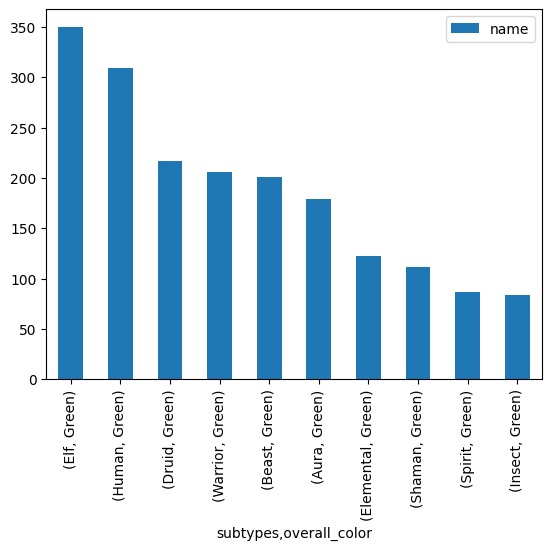

In [16]:
green_types = card_subtype_count_by_color.loc[card_subtype_count_by_color.index.get_level_values("overall_color") == "Green"]
green_types = green_types.sort_values(by="name", ascending=False)
print(green_types.head(10))
green_types.head(10).plot(kind="bar")

                         name
subtypes  overall_color      
Human     Blue            467
Wizard    Blue            465
Aura      Blue            266
Merfolk   Blue            192
Rogue     Blue            125
Spirit    Blue            119
Bird      Blue            117
Illusion  Blue             86
Elemental Blue             83
Soldier   Blue             72


<Axes: xlabel='subtypes,overall_color'>

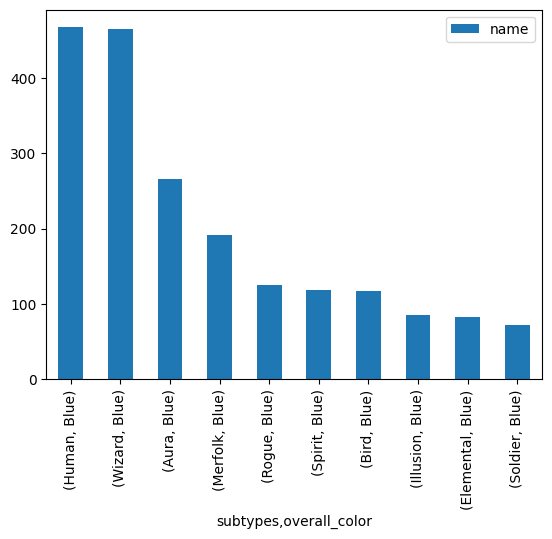

In [17]:
blue_types = card_subtype_count_by_color.loc[card_subtype_count_by_color.index.get_level_values("overall_color") == "Blue"]
blue_types = blue_types.sort_values(by="name", ascending=False)
print(blue_types.head(10))
blue_types.head(10).plot(kind="bar")

                         name
subtypes  overall_color      
Human     Red             441
Goblin    Red             348
Warrior   Red             310
Elemental Red             179
Shaman    Red             175
Aura      Red             151
Dragon    Red             140
Beast     Red              81
Giant     Red              79
Berserker Red              72


<Axes: xlabel='subtypes,overall_color'>

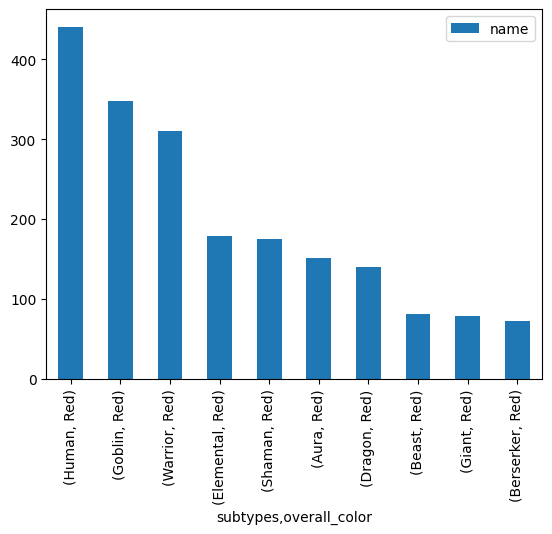

In [18]:
red_types = card_subtype_count_by_color.loc[card_subtype_count_by_color.index.get_level_values("overall_color") == "Red"]
red_types = red_types.sort_values(by="name", ascending=False)
print(red_types.head(10))
red_types.head(10).plot(kind="bar")

                         name
subtypes  overall_color      
Human     Multicolor      675
Wizard    Multicolor      286
Warrior   Multicolor      200
Elf       Multicolor      147
Soldier   Multicolor      141
Shaman    Multicolor      120
Zombie    Multicolor      103
Dragon    Multicolor      101
Cleric    Multicolor       98
Elemental Multicolor       92


<Axes: xlabel='subtypes,overall_color'>

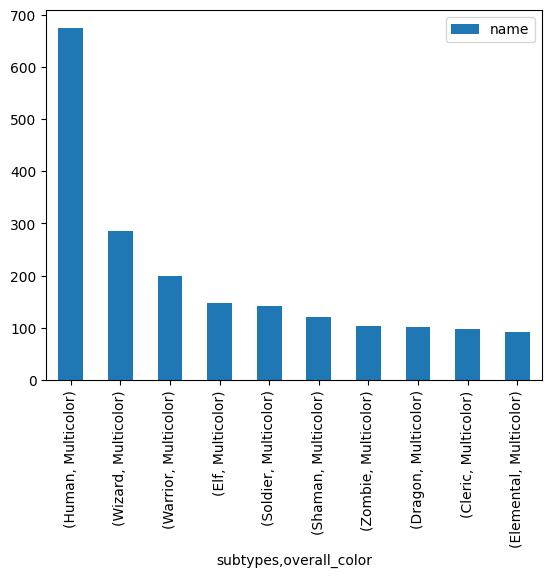

In [19]:
multi_types = card_subtype_count_by_color.loc[card_subtype_count_by_color.index.get_level_values("overall_color") == "Multicolor"]
multi_types = multi_types.sort_values(by="name", ascending=False)
print(multi_types.head(10))
multi_types.head(10).plot(kind="bar")

                           name
subtypes    overall_color      
Equipment   Colorless       288
Construct   Colorless       159
Golem       Colorless       111
Vehicle     Colorless        52
Contraption Colorless        44
Eldrazi     Colorless        40
Scarecrow   Colorless        37
Attraction  Colorless        35
Phyrexian   Colorless        31
Myr         Colorless        30


<Axes: xlabel='subtypes,overall_color'>

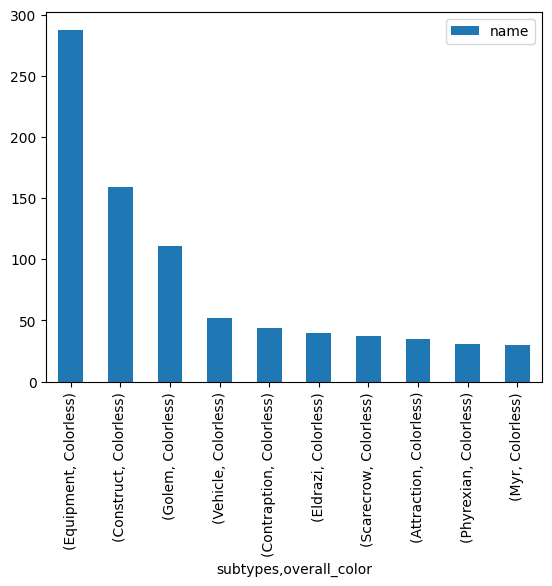

In [20]:
colorless_types = card_subtype_count_by_color.loc[card_subtype_count_by_color.index.get_level_values("overall_color") == "Colorless"]
colorless_types = colorless_types.sort_values(by="name", ascending=False)
print(colorless_types.head(10))
colorless_types.head(10).plot(kind="bar")

The sheer amount of humans was surprising and definitely will not help with classification. There are some types, however, that truly give away the colour such as elf for green, zombie for black, and equipment for colorless.

# Sets

In [22]:

unique_set_count = all_cards_no_dups["set_name"].nunique()
print(unique_set_count)

set_counts = all_cards_no_dups["set_name"].value_counts()

print(set_counts.head(30))


362
set_name
Innistrad: Double Feature                      513
Commander Legends: Battle for Baldur's Gate    446
Tenth Edition                                  368
Magic Online Promos                            349
Jumpstart 2022                                 337
Double Masters 2022                            327
Double Masters                                 320
Commander Legends                              283
Adventures in the Forgotten Realms             279
Kaldheim                                       265
Warhammer 40,000 Commander                     261
The Brothers' War                              261
Kamigawa: Neon Dynasty                         257
Champions of Kamigawa                          255
Jumpstart: Historic Horizons                   253
Amonkhet                                       251
Dominaria United                               250
Unlimited Edition                              241
Throne of Eldraine                             239
Mercadian Masques 

In [23]:
set_counts = all_cards_no_dups["set_name"].value_counts()
average_rows_per_set = set_counts.mean()
print(average_rows_per_set)

71.64917127071823


At first I was very surprised by this average, but considering the removal of duplicates, it begins to make sense. A possible explanation is that duplicate removal was isolated to certain sets.